# Plots for the analysis

In [2]:
# Import packages
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rcParams
import matplotlib 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
from bs4 import BeautifulSoup
import warnings
import requests
import nltk, nltk.sentiment, sklearn
import string
from nltk.corpus import stopwords

warnings.filterwarnings('ignore')

In [3]:

#Importing the data
df = pd.read_csv("/Users/cecil/OneDrive/Dokumenter/sds2019_2/Group-31-SoDa/Data/movie_2.csv", index_col=0)

#Make a copy of the data set

df2 = df.copy()


df

,Title,Year,Rating,Gross in M$,Director,Summary,Top Star,Genre 1,Genre 2,Genre 3,Female,d_Female,d_Drop
0,En verden udenfor,1994,9.3,28.34,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Drama,NaN,NaN,0.0,0.0,0.0
1,The Dark Knight,2008,9.0,534.86,Christopher Nolan,When the menace known as The Joker emerges fro...,Christian Bale,Action,Crime,Drama,0.0,0.0,0.0
2,Inception,2010,8.8,292.58,Christopher Nolan,A thief who steals corporate secrets through t...,Leonardo DiCaprio,Action,Adventure,Sci-Fi,0.0,0.0,0.0
3,Fight Club,1999,8.8,37.03,David Fincher,An insomniac office worker and a devil-may-car...,Brad Pitt,Drama,NaN,NaN,0.0,0.0,0.0
4,Pulp Fiction,1994,8.9,107.93,Quentin Tarantino,"The lives of two mob hitmen, a boxer, a gangst...",John Travolta,Crime,Drama,NaN,0.0,0.0,0.0
5,Forrest Gump,1994,8.8,330.25,Robert Zemeckis,"The presidencies of Kennedy and Johnson, the e...",Tom Hanks,Drama,Romance,NaN,0.0,0.0,0.0
6,The Matrix,1999,8.7,171.48,Lana Wachowski,A computer hacker learns from mysterious rebel...,Keanu Reeves,Action,Sci-Fi,NaN,0.0,1.0,0.0
7,Ringenes herre: Eventyret om ringen,2001,8.8,315.54,Peter Jackson,A meek Hobbit from the Shire and eight compani...,Elijah Wood,Adventure,Drama,Fantasy,0.0,0.0,0.0
8,Ringenes herre: Kongen vender tilbage,2003,8.9,377.85,Peter Jackson,Gandalf and Aragorn lead the World of Men agai...,Elijah Wood,Adventure,Drama,Fantasy,0.0,0.0,0.0
9,The Dark Knight Rises,2012,8.4,448.14,Christopher Nolan,Eight years after the Joker's reign of anarchy...,Christian Bale,Action,Thriller,NaN,0.0,0.0,0.0


In [3]:
#Cleaning genre

df2['Genre 1'] = df["Genre 1"].str.strip()
df2["Genre 2"] = df["Genre 2"].str.strip()
df2["Genre 3"] = df["Genre 3"].str.strip()


In [4]:

df3= df2.copy()
df4= df2.copy()
df5= df2.copy()
df6= df2.copy()
df7= df2.copy()
df8= df2.copy()
df9= df2.copy()


###  Plot of top ten directors 

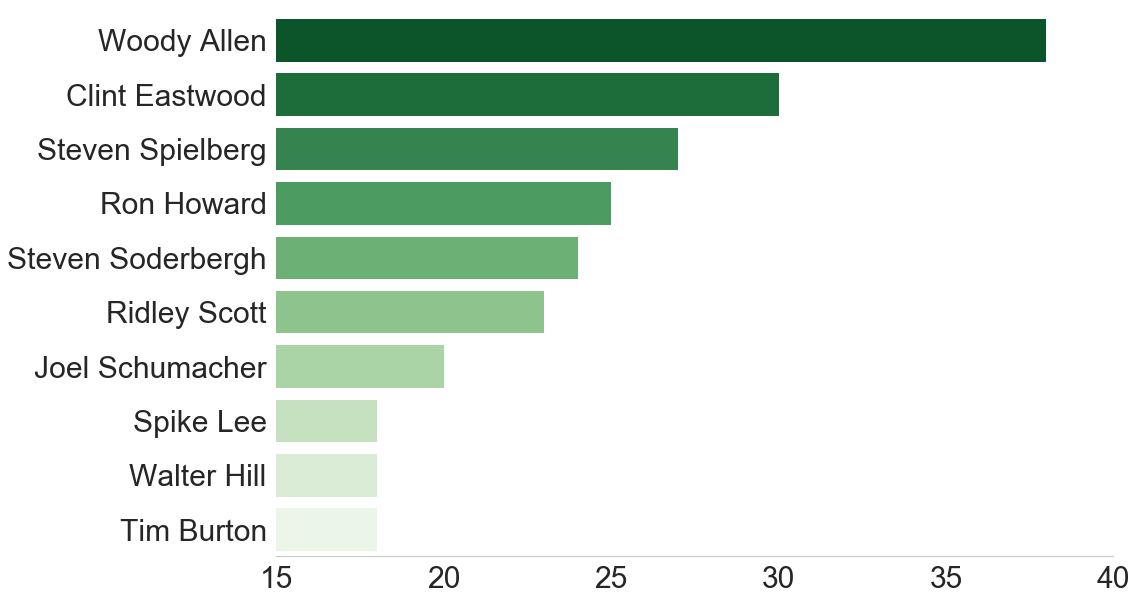

In [6]:
# top 10 directors overall
#Defining data for directors
dfd1 = df3.drop(df3[df3.d_Drop == 1].index)

#Plotting starts from here
top10_directors = dfd1["Director"].value_counts()[:10]
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
ax = sns.barplot(top10_directors.values, top10_directors.index, palette=("Greens_r"))
#plt.xlabel("Count", fontsize=15, color="Black")
plt.grid(False)
plt.tick_params(labelsize=30)
sns.despine(left=True, right=True, bottom=False)
ax.set_xlim([15,40])
rcParams.update({'figure.autolayout': True})
#ax.yaxis.set_tick_params(labelsize=20, colors='black', pad=-200, labeltop='on', labelbottom='off')
plt.savefig('Top10Directors', bbox_inches='tight')
plt.show()



### Plot of top ten actors

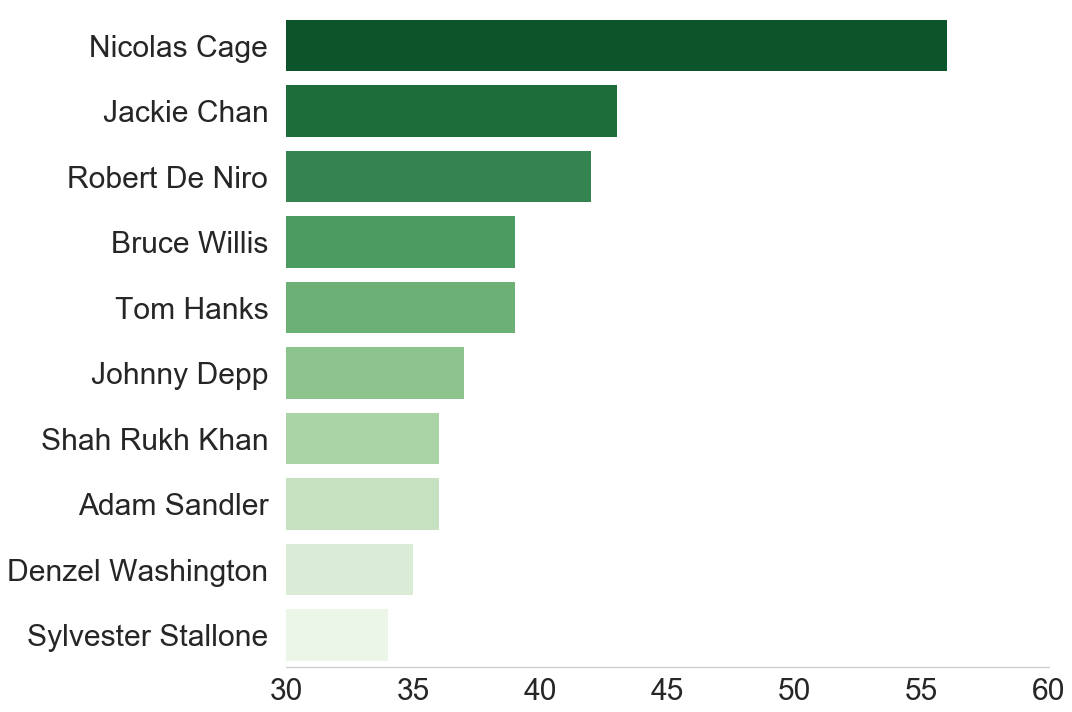

In [13]:
top10_actors = df4["Top Star"].value_counts()[:10]
plt.figure(figsize=(15,10))
ax1 = sns.barplot(top10_actors.values, top10_actors.index, palette=("Greens_r"))
#plt.xlabel("Count", fontsize=13, color="Black")
#plt.ylabel("Top Star", fontsize=13, color="Black")
plt.grid(False)
sns.despine(left=True, right=True, bottom=False)
ax1.set_xlim([30,60])
plt.tick_params(labelsize=30)
rcParams.update({'figure.autolayout': True})
plt.savefig('Top10Actors.png', bbox_inches='tight')
plt.show()

### Female leads

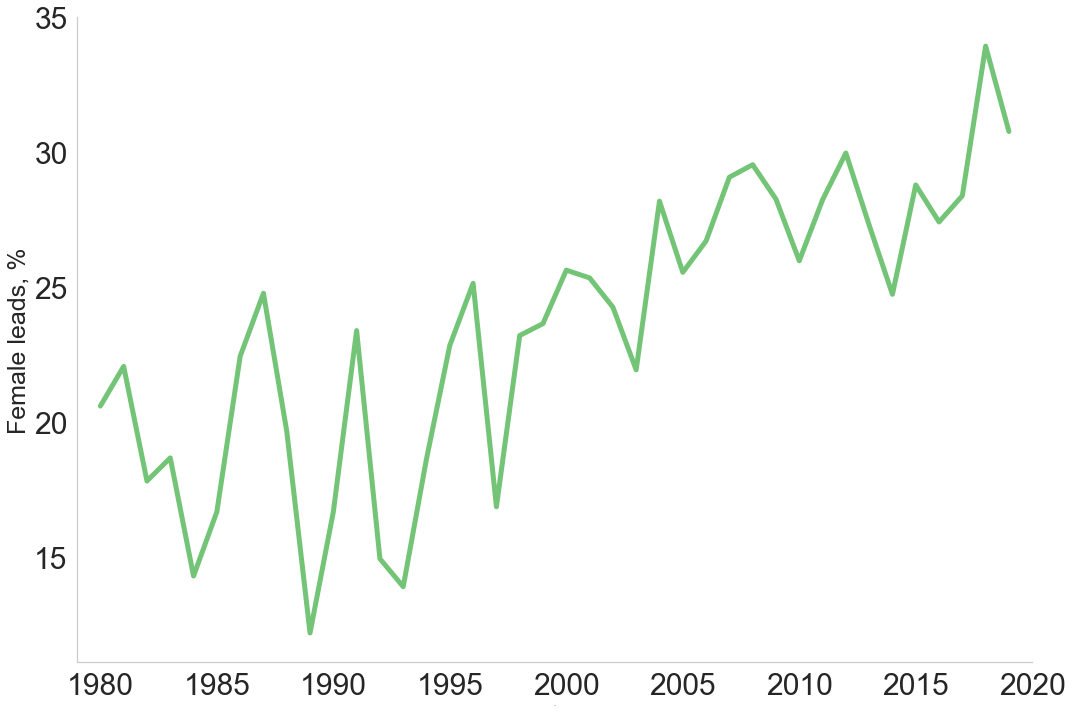

In [14]:
df1x = df5.groupby(['Year'])

df2x = df1x['Female'].mean().reset_index()
df2x['Female'] = df2x['Female']*100

plt.figure(figsize=(15,10))
df3x = df2x.set_index('Year')
ax = sns.lineplot(data=df3x, legend = None, palette = 'Greens', linewidth=5)
ax.set_xlim([1979,2020])
ax.grid(False)
plt.xlabel('Year', fontsize=1)
plt.ylabel('Female leads, %', fontsize=25)
plt.tick_params(labelsize=30)
#matplotlib.rc('xtick', labelsize=30) 
#matplotlib.rc('ytick', labelsize=30)
plt.rc('legend', fontsize=30) 
sns.despine(left=False, right=True, bottom=False)
plt.savefig("percent actresses")

### Genre 

In [15]:
# Getting and transforming the data

test_df = df6[['Female', 'Genre 1', 'Genre 2', 'Genre 3']]

genre_1 = test_df[['Female', 'Genre 1']]
genre_2 = test_df[['Female', 'Genre 2']]
genre_3 = test_df[['Female', 'Genre 3']]

genre_1x = genre_1.rename(columns = {'Genre 1': 'Genre'})
genre_2x = genre_2.rename(columns = {'Genre 2': 'Genre'})
genre_3x = genre_3.rename(columns = {'Genre 3': 'Genre'})


all_genres = pd.concat([genre_1x, genre_2x, genre_3x])


#Ad total amount of males vs females in the graph below in a pie chart

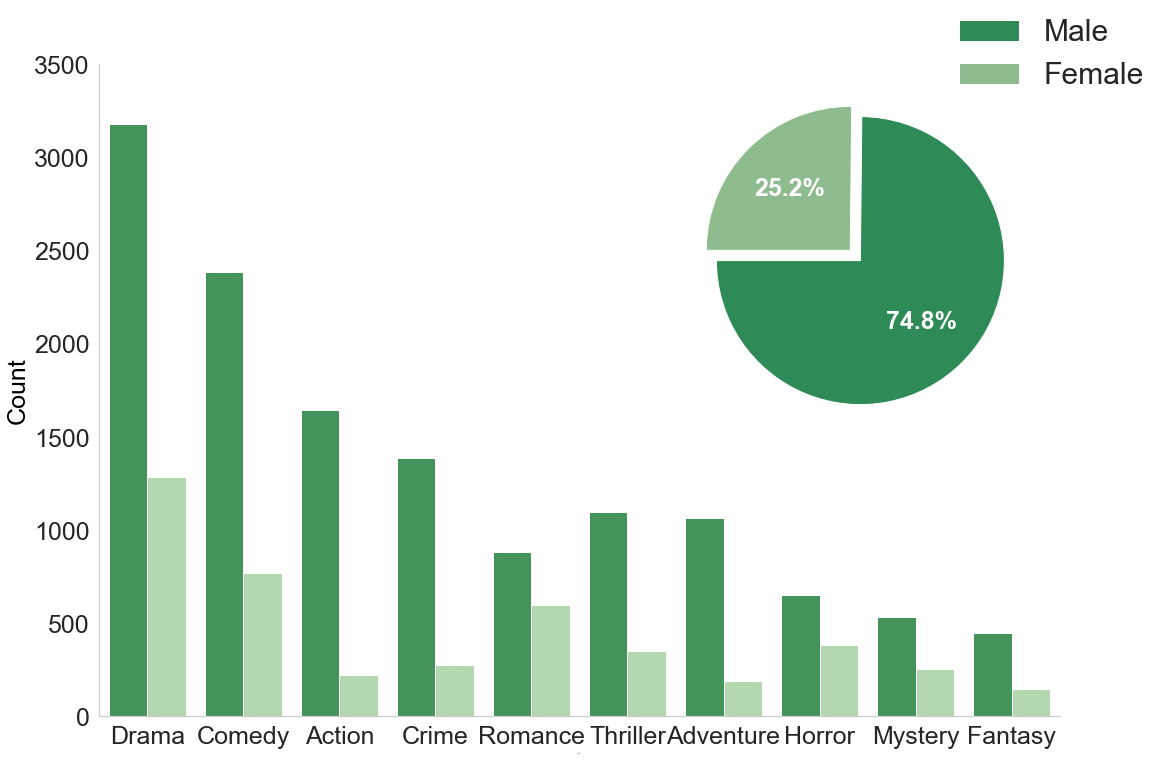

In [16]:
#Define data used for pie chart
ratios = df6["Female"].value_counts("0")
labels = 'Male', 'Female'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Female')

#Outer plot
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_xlim([0,100]) #Sets the number of the axis
ax.set_ylim([0,3500])
ax.grid(False)
plt.tick_params(labelsize=25)
rcParams.update({'figure.autolayout': True})


axes = sns.countplot(x="Genre", data=all_genres, hue="Female", order = all_genres['Genre'].value_counts()[:10].index, hue_order = all_genres['Female'].value_counts().index, palette='Greens_r')
plt.xlabel('Genre', fontsize=1, color='Black')
plt.ylabel('Count', fontsize=25, color='Black')
sns.despine(left=False, right=True, bottom=False)
ax.get_legend().set_visible(False)



# Inner plot
ax1= plt.axes([0.55, 0.45, 0.5, 0.5])
wedges, texts, autotexts = plt.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=180, colors = ["seagreen",'darkseagreen'], textprops=dict(color="white"), wedgeprops   = { 'linewidth' : 1,'edgecolor' : "white" })
plt.setp(autotexts, size=25, weight='bold')
plt.legend(wedges, labels, loc='best', frameon=False)
plt.tight_layout()

ax1.legend(bbox_to_anchor=(0.7, 0.9), frameon=False)
plt.savefig('Genrething.png', bbox_inches='tight')

### Directors, plot 1

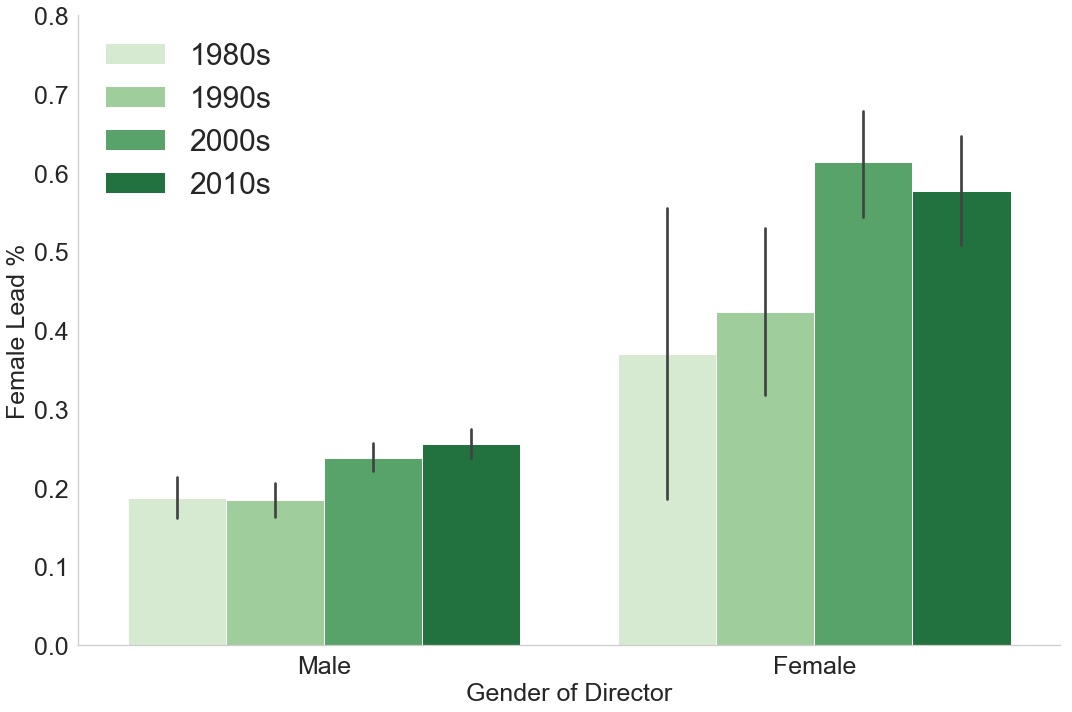

In [17]:
#Preparing the data
done = df7.drop(df7[df7.d_Drop == 1].index)
work=done.groupby(['Year'])
work_d=done[done.d_Drop == 0]
work_d.loc[(2010 <= work_d.Year) & (work_d.Year < 2020), 'Decade'] = '2010s'
work_d.loc[(2000 <= work_d.Year) & (work_d.Year < 2010), 'Decade'] = '2000s'
work_d.loc[(1990 <= work_d.Year) & (work_d.Year < 2000), 'Decade'] = '1990s'
work_d.loc[(1980 <= work_d.Year) & (work_d.Year < 1990), 'Decade'] = '1980s'


#Making the plot
fig, ax = plt.subplots(figsize = (15, 10))
ax.set_ylim([0,0.8])
gender=['Male','Female']

sns.barplot(x='d_Female', y='Female', hue='Decade',hue_order=["1980s","1990s",'2000s','2010s'] , data=work_d, palette=('Greens'))
plt.xlabel('Gender of Director', fontsize='25')
plt.ylabel('Female Lead %', fontsize='25')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(gender))
matplotlib.rc('xtick', labelsize=25)
matplotlib.rc('ytick', labelsize=25)
ax.grid(False)

ax.legend(frameon=False)

sns.despine(left=False, bottom=False, right=True)
plt.savefig('Directors.png')

### Directors, plot 2

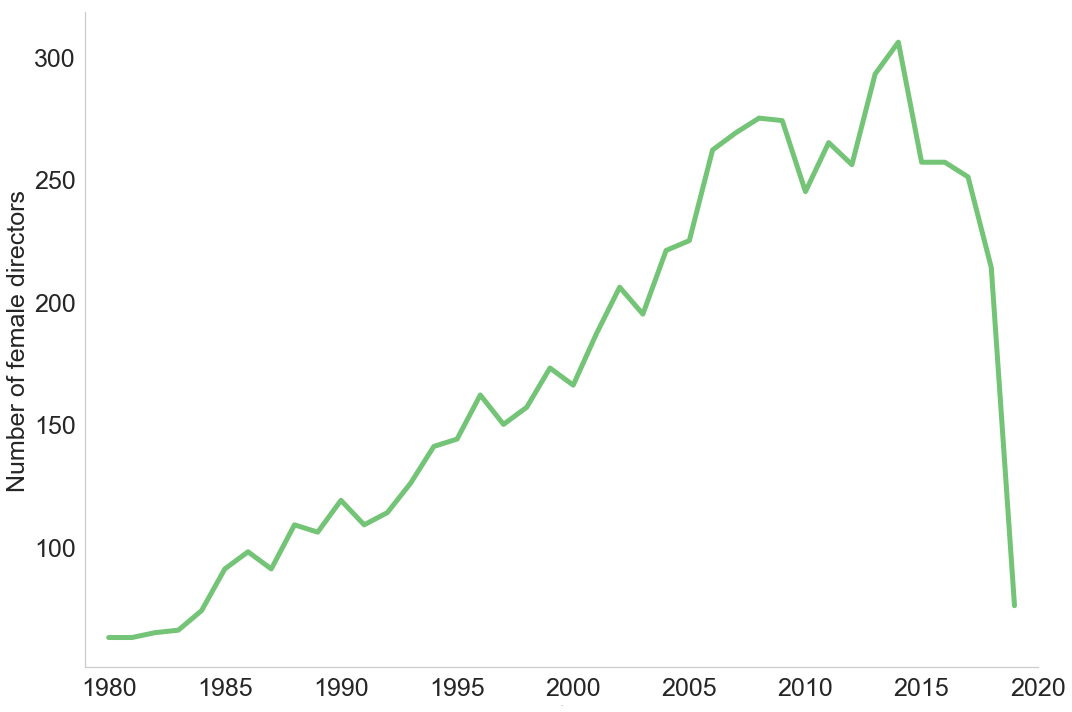

In [18]:
dfd = df8.drop(df8[df8.d_Drop == 1].index)
dfd1 = dfd.groupby(['Year'])

dfd2=dfd1['d_Female'].count().reset_index()
dfd3 = dfd2.set_index('Year')
plt.figure(figsize=(15,10))
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)
ax2 = sns.lineplot(data=dfd3, legend = False, palette = 'Greens', linewidth=5)
ax2.set_xlim([1979,2020])
ax2.grid(False)
plt.xlabel('Year', fontsize=1)
plt.ylabel('Number of female directors', fontsize=25)
#plt.rc('legend', fontsize=15) 
sns.despine(left=False, right=True, bottom=False)
plt.savefig("number_director")

# Wordclouds



In [6]:
name = nltk.corpus.names
nltk.download('stopwords')

nltk.download('vader_lexicon')
vader = nltk.sentiment.vader.SentimentIntensityAnalyzer()
from afinn import Afinn
afinn = Afinn()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cecil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\cecil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [8]:
done4=df9
text=done4[['Female','d_Female','Summary','d_Drop']]
text.head(1)

,Female,d_Female,Summary,d_Drop
0,0.0,0.0,Two imprisoned men bond over a number of years...,0.0


In [9]:
from nltk.tokenize import RegexpTokenizer

tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
def preprocessing(string):
    lower=string.lower()
    token=tokenizer.tokenize(lower)
    return token
text['Token']=text['Summary'].apply(preprocessing)

from nltk.probability import FreqDist
fdist = FreqDist(text['Token'][25])
print(fdist)
fdist.most_common(10)

<FreqDist with 26 samples and 30 outcomes>


[('the', 3),
 ('his', 2),
 ('to', 2),
 ('based', 1),
 ('on', 1),
 ('true', 1),
 ('story', 1),
 ('of', 1),
 ('jordan', 1),
 ('belfort', 1)]

### Male text analysis

In [10]:
import string
from nltk.corpus import stopwords
text_m=text[text.Female != 1].reset_index()
stop=stopwords.words('english')


stop1=stop+list(','+'a'+'.'+'"')
def remove_stop(x):
    removed_stop=[]
    for y in x:
        removed_stop.append(' '.join([word for word in y.split() if word not in stop1]))
    return removed_stop
no_stop_m=remove_stop(text_m['Summary'])

su_m=str()
for i in range(6184):
    su_m=su_m + str(no_stop_m[i])

su_m_1=preprocessing(su_m)

fdist = FreqDist(su_m_1)
print(fdist)
m = fdist.most_common(31)
m[3:] # exclude the first non-useful words

<FreqDist with 15516 samples and 104263 outcomes>


[('man', 694),
 ('young', 648),
 ('life', 633),
 ('new', 540),
 ('two', 505),
 ('in', 429),
 ('family', 419),
 ('one', 413),
 ('an', 395),
 ('world', 383),
 ('must', 369),
 ('find', 366),
 ('love', 320),
 ('when', 319),
 ('story', 312),
 ('woman', 288),
 ('finds', 274),
 ('father', 267),
 ('group', 263),
 ('he', 256),
 ('old', 255),
 ('see', 250),
 ('friends', 249),
 ('war', 247),
 ('after', 242),
 ('wife', 241),
 ('school', 239),
 ('full', 237)]

In [11]:
List = pd.Series(m[3:])
List.head()

0      (man, 694)
1    (young, 648)
2     (life, 633)
3      (new, 540)
4      (two, 505)
dtype: object

In [12]:
List = [list(i) for i in List]
List

[['man', 694],
 ['young', 648],
 ['life', 633],
 ['new', 540],
 ['two', 505],
 ['in', 429],
 ['family', 419],
 ['one', 413],
 ['an', 395],
 ['world', 383],
 ['must', 369],
 ['find', 366],
 ['love', 320],
 ['when', 319],
 ['story', 312],
 ['woman', 288],
 ['finds', 274],
 ['father', 267],
 ['group', 263],
 ['he', 256],
 ['old', 255],
 ['see', 250],
 ['friends', 249],
 ['war', 247],
 ['after', 242],
 ['wife', 241],
 ['school', 239],
 ['full', 237]]

In [13]:
# define a list of words that should not be in the result

stupid_words_m = ["new", "in", "an", "two", "one", "when", "two", "after", "see", "find", "he"]

for e in range(0,len(List)-len(stupid_words_m)):
    if List[e][0] in stupid_words_m:
        List.remove(List[e])
    else:
        pass

In [14]:
# getting top 20
List

[['man', 694],
 ['young', 648],
 ['life', 633],
 ['two', 505],
 ['family', 419],
 ['an', 395],
 ['world', 383],
 ['must', 369],
 ['love', 320],
 ['story', 312],
 ['woman', 288],
 ['finds', 274],
 ['father', 267],
 ['group', 263],
 ['old', 255],
 ['friends', 249],
 ['war', 247],
 ['after', 242],
 ['wife', 241],
 ['school', 239],
 ['full', 237]]

### Female Text Analysis

In [15]:
text_f=text[text.Female == 1].reset_index()
def remove_stop(x):
    removed_stop=[]
    for y in x:
        removed_stop.append(' '.join([word for word in y.split() if word not in stop]))
    return removed_stop
no_stop_f=remove_stop(text_f['Summary'])

su_f=str()
for i in range(1000):
    su_f=su_f + str(no_stop_f[i])

su_f_1=preprocessing(su_f)

fdist = FreqDist(su_f_1)
print(fdist)
f = fdist.most_common(30)
f[2:] # exclude the first non-useful words

<FreqDist with 5516 samples and 16661 outcomes>


[('woman', 168),
 ('young', 155),
 ('life', 122),
 ('new', 108),
 ('the', 98),
 ('girl', 90),
 ('two', 77),
 ('love', 77),
 ('one', 77),
 ('family', 69),
 ('school', 65),
 ('in', 64),
 ('finds', 62),
 ('world', 61),
 ('man', 59),
 ('mother', 59),
 ('must', 57),
 ('after', 55),
 ('an', 55),
 ('group', 54),
 ('when', 47),
 ('home', 47),
 ('town', 44),
 ('friends', 43),
 ('husband', 43),
 ('story', 43),
 ('three', 42),
 ('city', 42)]

In [16]:
Listf = pd.Series(f[2:])
Listf.head()

0    (woman, 168)
1    (young, 155)
2     (life, 122)
3      (new, 108)
4       (the, 98)
dtype: object

In [17]:
Listf = [list(i) for i in Listf]
Listf

[['woman', 168],
 ['young', 155],
 ['life', 122],
 ['new', 108],
 ['the', 98],
 ['girl', 90],
 ['two', 77],
 ['love', 77],
 ['one', 77],
 ['family', 69],
 ['school', 65],
 ['in', 64],
 ['finds', 62],
 ['world', 61],
 ['man', 59],
 ['mother', 59],
 ['must', 57],
 ['after', 55],
 ['an', 55],
 ['group', 54],
 ['when', 47],
 ['home', 47],
 ['town', 44],
 ['friends', 43],
 ['husband', 43],
 ['story', 43],
 ['three', 42],
 ['city', 42]]

In [18]:
# define a list of words that should not be in the result
stupid_words_f = ["the", "two", "one", "in", "after", "an", "when", "three", "new"]

for e in range(0,len(Listf)-len(stupid_words_f)):
    if Listf[e][0] in stupid_words_f:
        #print(Listf[e])
        Listf.remove(Listf[e])
    else:
        pass

In [19]:
Listf

[['woman', 168],
 ['young', 155],
 ['life', 122],
 ['the', 98],
 ['girl', 90],
 ['love', 77],
 ['family', 69],
 ['school', 65],
 ['finds', 62],
 ['world', 61],
 ['man', 59],
 ['mother', 59],
 ['must', 57],
 ['an', 55],
 ['group', 54],
 ['home', 47],
 ['town', 44],
 ['friends', 43],
 ['husband', 43],
 ['story', 43],
 ['three', 42],
 ['city', 42]]

### Wordcloud male

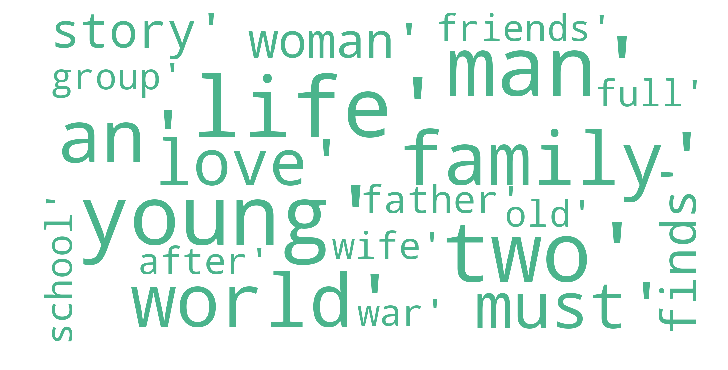

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(157,41%%, %d%%)" % np.random.randint(50,51))


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=50,
        min_font_size=5, 
        scale=5,
        random_state=1
    ).generate(str(data))
    wordcloud.recolor(color_func = grey_color_func)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(List) # wordcloud male

### Wordcloud Female

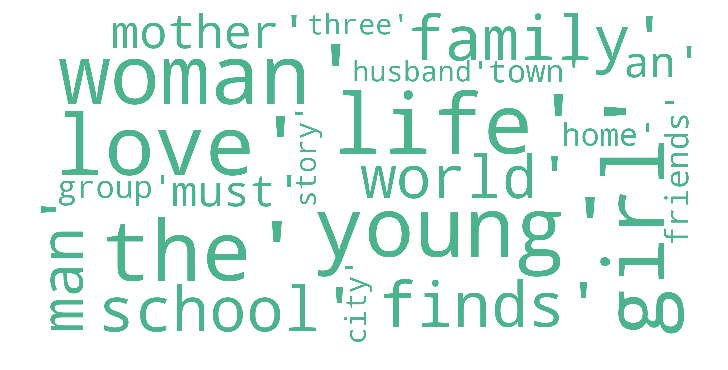

In [22]:
show_wordcloud(Listf) # wordcloud female

# Plots: Data Collection process

In [55]:
import scraping_class
logfile = 'log.csv'## name your log file.
connector = scraping_class.Connector(logfile)

In [58]:
### Getting the data for the years all the way back to 1920

year_list= []

for v in range(1, 201):
    url1 = 'https://www.imdb.com/search/keyword/?ref_=kw_nxt&mode=detail&page={}&title_type=movie&fbclid=IwAR3AAeVD_whYi1AwPsSGdYsgH8FnupVrBhImRFD__GL3wdHegJwcxrUsfyc&sort=num_votes,desc'.format(v)
    call = 'Exam, KU{}'.format(v)
    response,callid = connector.get(url1, call)
    html = response.text
    soup = BeautifulSoup(html,'lxml')
    
    for i in range(50):
        headline_i = soup.findAll('h3')[i] # search for the first headline: h1 tag. 
        value = headline_i.text.strip() # extract text using build in method        
        film = value.split('\n')[2]
        if len(film)> 6:
            film = value.split(' ')[-1]
        year_list.append(film)


len(year_list)

year_list

['(1994)',
 '(2008)',
 '(2010)',
 '(1999)',
 '(1994)',
 '(1994)',
 '(1999)',
 '(2001)',
 '(2003)',
 '(1972)',
 '(2012)',
 '(2002)',
 '(2014)',
 '(1995)',
 '(2012)',
 '(2000)',
 '(2005)',
 '(2012)',
 '(1991)',
 '(2009)',
 '(1977)',
 '(1998)',
 '(1993)',
 '(2006)',
 '(2006)',
 '(1980)',
 '(2009)',
 '(2013)',
 '(2000)',
 '(1999)',
 '(2010)',
 '(1974)',
 '(1999)',
 '(2003)',
 '(1997)',
 '(2014)',
 '(1998)',
 '(2005)',
 '(1985)',
 '(1994)',
 '(1991)',
 '(2003)',
 '(1990)',
 '(2008)',
 '(1995)',
 '(1995)',
 '(2003)',
 '(2008)',
 '(1983)',
 '(2009)',
 '(1994)',
 '(1999)',
 '(1998)',
 '(1975)',
 '(1992)',
 '(2004)',
 '(2016)',
 '(1981)',
 '(1995)',
 '(2012)',
 '(1980)',
 '(1993)',
 '(2015)',
 '(2015)',
 '(2001)',
 '(1997)',
 '(2007)',
 '(2014)',
 '(2008)',
 '(2001)',
 '(1984)',
 '(2002)',
 '(1988)',
 '(2000)',
 '(2012)',
 '(1979)',
 '(2005)',
 '(2013)',
 '(2000)',
 '(2001)',
 '(2013)',
 '(2018)',
 '(2011)',
 '(1971)',
 '(2006)',
 '(2010)',
 '(2011)',
 '(2015)',
 '(2011)',
 '(2011)',
 '(2015)',

In [59]:
#Converting to a new list
year_listny = []

for i in range(10000):
    ny= year_list[i][1:5]
    year_listny.append(ny)


years = list(map(int, year_listny))

C:\Users\cecil\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


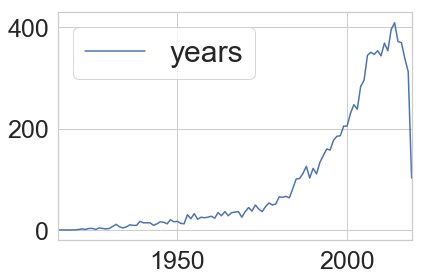

In [62]:
years_pd = pd.DataFrame(years)


years_pd['count'] = 1

years_pd['years'] = years_pd[0]
tael = years_pd['years'].value_counts()
taelny = pd.DataFrame(tael)

taelny.sort_index().plot()

taels = taelny.sort_index()

C:\Users\cecil\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\cecil\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


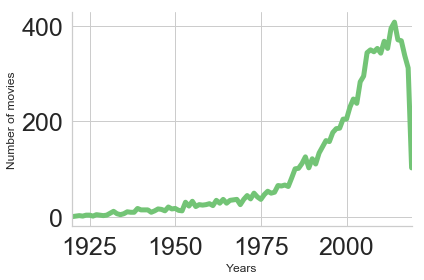

In [63]:
# Plot for the years 1920 - 2019
fig1=sns.lineplot(data=taels, palette='Greens', legend = None, linewidth=5)
plt.xlabel('Years')
plt.ylabel('Number of movies')
axes = plt.axes()
axes.set_xlim([1920, 2019])
sns.despine(left=False, right=True, bottom=False)
plt.savefig('xfig1.png')

C:\Users\cecil\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\cecil\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


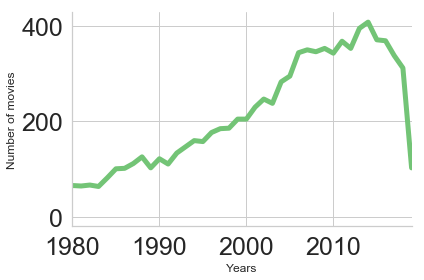

In [64]:
# Plot for the years 1980 - 2019
fig2 = sns.lineplot(data=taels, palette='Greens', legend = None, linewidth=5)
plt.xlabel('Years')
plt.ylabel('Number of movies')
axes = plt.axes()
axes.set_xlim([1980, 2019])
sns.despine(left=False, right=True, bottom=False)
plt.savefig('xfig2.png')